In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
#tf.__version__
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

plt.rcParams['figure.figsize'] = [10,10]

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K


from tensorflow.keras.layers import Layer
from tensorflow.image import flip_up_down, flip_left_right, rot90
from tensorflow.compat.v1 import extract_image_patches
import numpy as np

from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
image = np.random.random(size = (1,224,224,3 ))
image = (image - 0.5) * 20 + 128

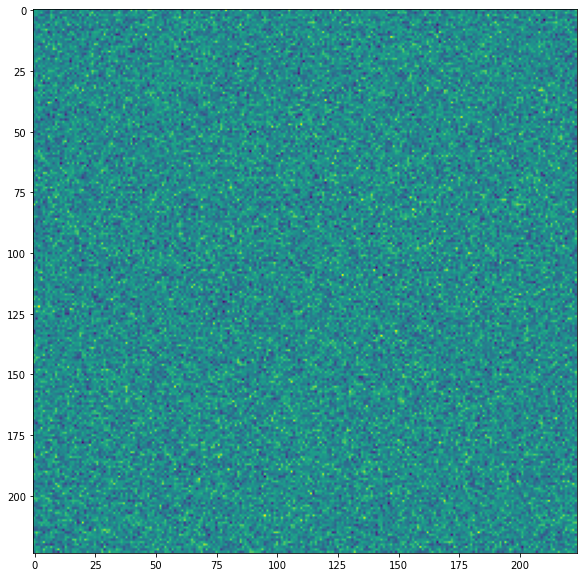

In [37]:
plt.imshow(input)

In [50]:
layer_name = "block4_conv1"
layer = [l for l in model.layers if layer_name == l.name][0]
get_layer_output = K.function([model.input], layer.output)
layer_out = np.array(get_layer_output(image))
loss = K.mean(layer_out[:,:,:,3][0])


AttributeError: 'numpy.dtype[float32]' object has no attribute 'base_dtype'

In [44]:
plt.imshow(loss)

NameError: name 'loss' is not defined